# The Time dependent Heat Equation

## The Governing Equation

$$ \frac{\partial u}{\partial t} = \nabla^2u + f \hspace{5pt} \in \Omega \times (0, T)$$

Let the boundary be $\partial\Omega$, hence the boundary conditions are:

$$ u(x, y, t) = u_D \in \partial \Omega \times (0, T)$$

$$u(x, y, 0) = u_0 \hspace{5pt} at \hspace{5pt} t=0$$ 

Now, lets substitute the time derivative with a finite difference expression, with a backward euler formulation, 

$$ \frac{u_{t} - u_{t-1}}{\Delta t} = \frac{\partial u_t}{\partial t} = \nabla^2u_t + f \hspace{5pt} \in \Omega \times (0, T)$$

Cross multiply with $\Delta t$ to get, 

$$u_t - u_{t-1} = \nabla^2u_t\Delta t + \Delta t f$$

rearranging the terms we get, 

$$u_t - \nabla^2u_t\Delta t = u_{t-1} + f\Delta t$$

Now, we use our age-old technique, multiply with a test function $v$ such that $v\in \hat{V}$, 

$$ v = 0 \in \partial \Omega \times (0 , T)$$

$$ vu_t - v\nabla^2u_t\Delta t = vu_{t-1} + vf\Delta t$$

Integrating over the entire domain we get, 

$$ \int_{\Omega} vu_t - v\nabla^2u_t\Delta t = \int_{\Omega} vu_{t-1} + vf\Delta t$$

We know the following identity, 

$$ \nabla(f\vec{A}) = \nabla f . \vec{A} + f\nabla\vec{A}$$

On similar lines, 

$$ \nabla.(v\nabla u) = \nabla v .\nabla u + v\nabla^2 u$$

Replacing the term in the above integral, we get, 

$$ \int_{\Omega} vu_t + \nabla v. \nabla u \Delta t- \nabla.(v\nabla u)\Delta t = \int_{\Omega} vu_{t-1} + vf\Delta t$$

Applying divergence theorem on the third term in the integral on the LHS we get, 

$$\int_{\Omega} vu_t + \nabla v. \nabla u \Delta t - \int_{\partial \Omega} \Delta t(v\nabla u).\hat{n} = \int_{\Omega} vu_{t-1} + vf\Delta t$$

But since $v$ is the test function and the way it is defined we get the second integral on the LHS equals zero. Hence we are left with, 

$$\int_{\Omega} vu_t + \nabla v. \nabla u \Delta t = \int_{\Omega} vu_{t-1} + vf\Delta t \hspace{5pt} where \hspace{5pt} t=1,2\ldots$$

Now, substituting $t=1$ we get, 

$$\int_{\Omega} vu_1 + \nabla v. \nabla u_1 \Delta t = \int_{\Omega} vu_{0} + vf_1\Delta t \hspace{5pt} where \hspace{5pt} t=1,2\ldots$$

And here $\Delta t = 1$, hence, 

$$\int_{\Omega} vu_1 + \nabla v. \nabla u_1 = \int_{\Omega} vu_{0} + vf_1 \hspace{5pt} where \hspace{5pt} t=1,2\ldots$$

Now lets solve it in FEniCS by constructing some made up function. 

Lets use the manufactured solution of $u = 1 + x^2 + \alpha y^2 + \beta t$ Substituting this, we get that the values of $u_D$ adn  $f$ are :

$$ u_D = 1 + x^2 + \alpha y^2 + \beta t$$

$$u_0 = 1 + x^2 + \alpha y^2 $$

$$f = \beta - 2 - 2\alpha$$

In [38]:
from fenics import *
%matplotlib inline
import matplotlib.pyplot as plt

alpha, beta = 3, 1.2

Now since this is a dynamic problem involving time too, we can use iterative methods, lets compute the behaviour for about 20 seconds. 

<ipython-input-48-6cbf6bdce124>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


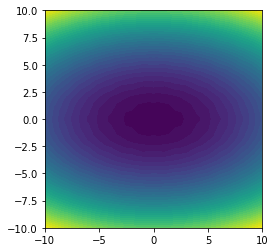

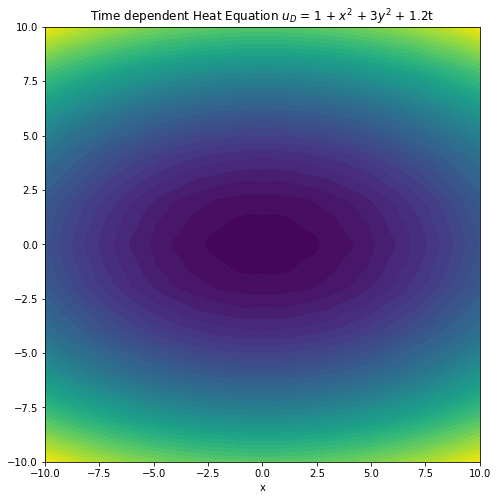

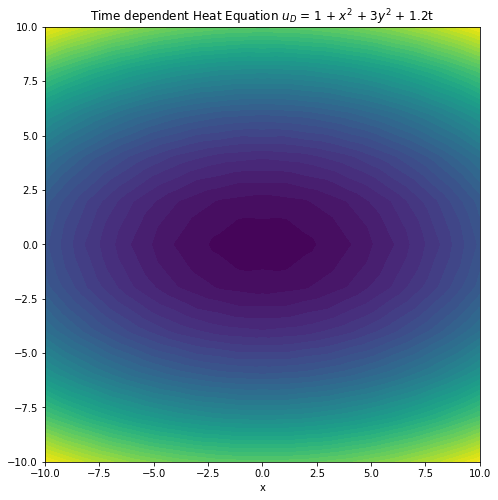

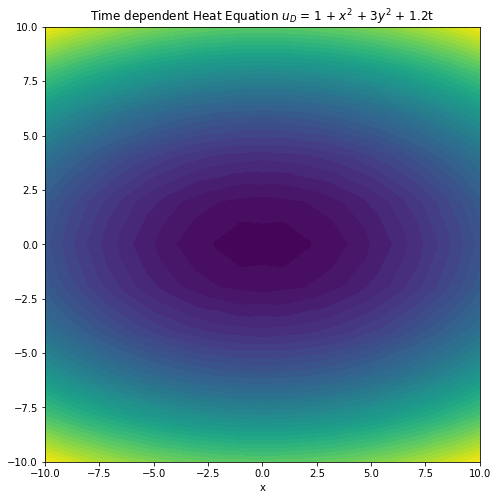

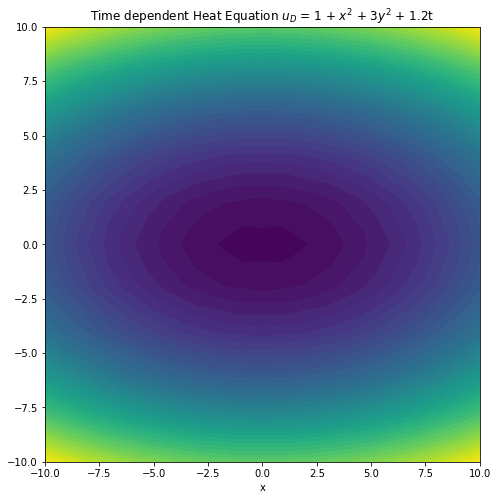

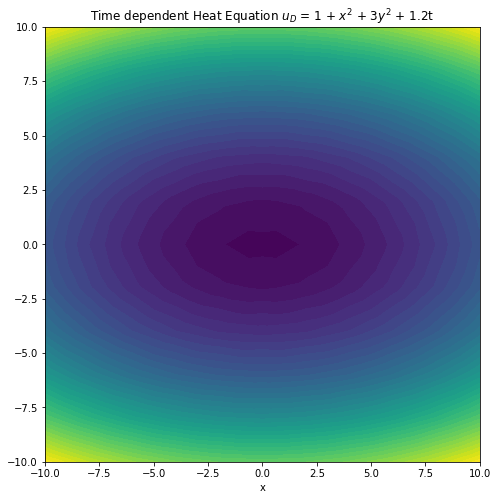

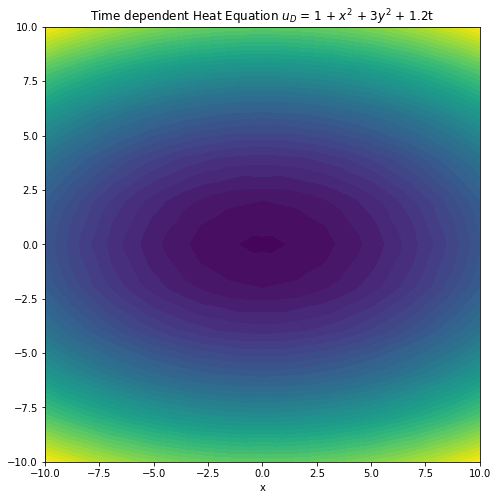

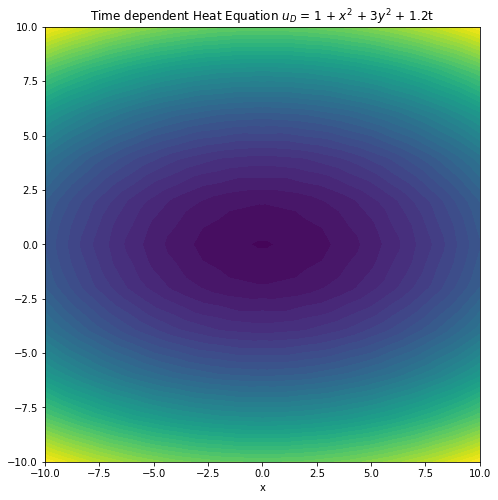

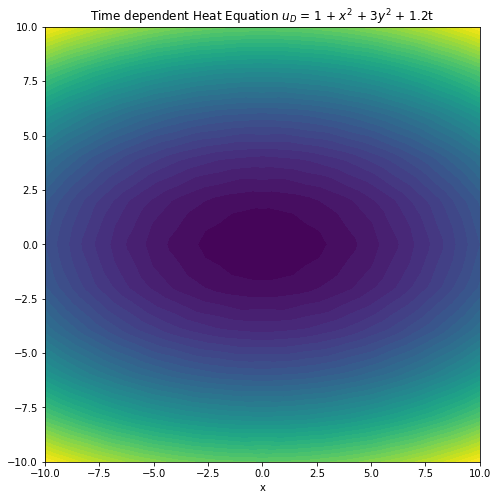

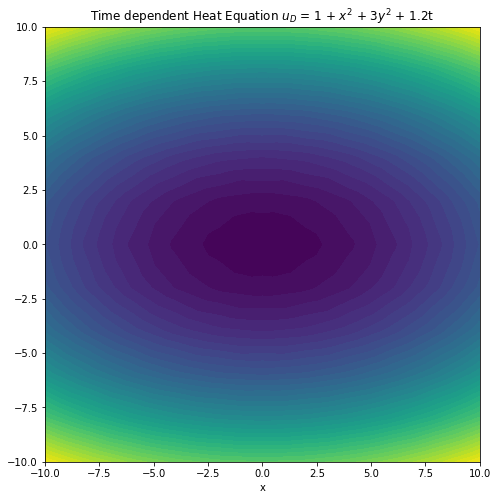

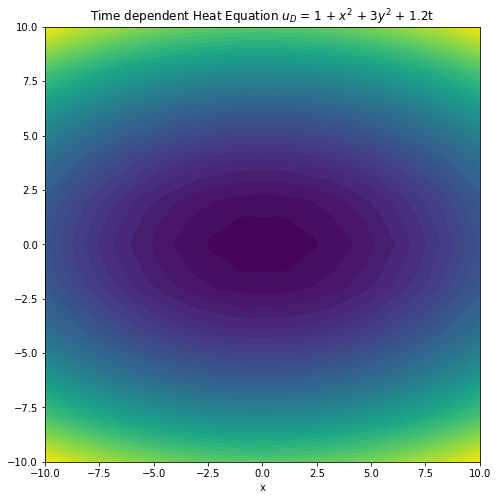

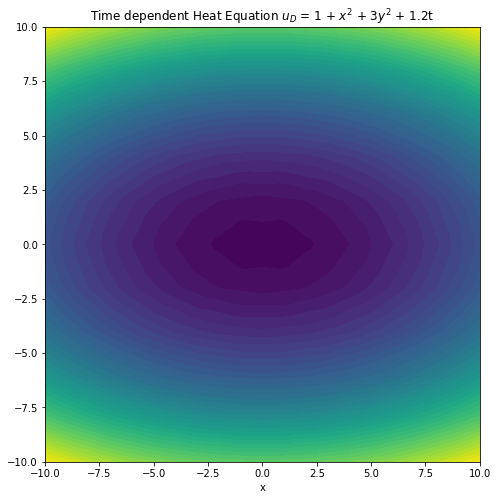

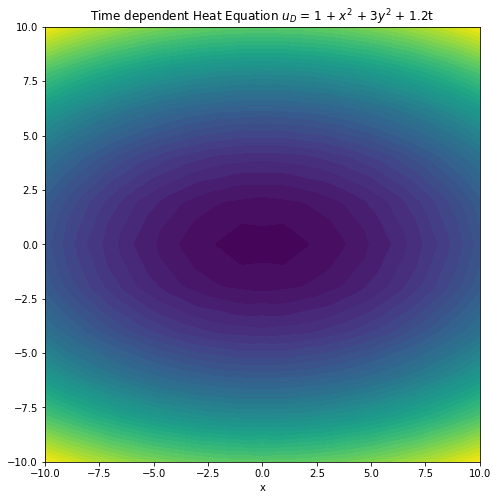

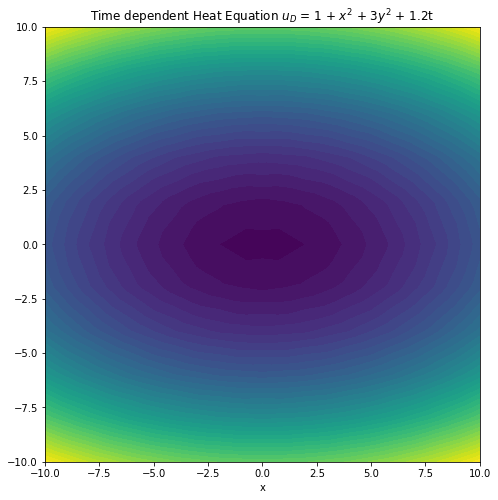

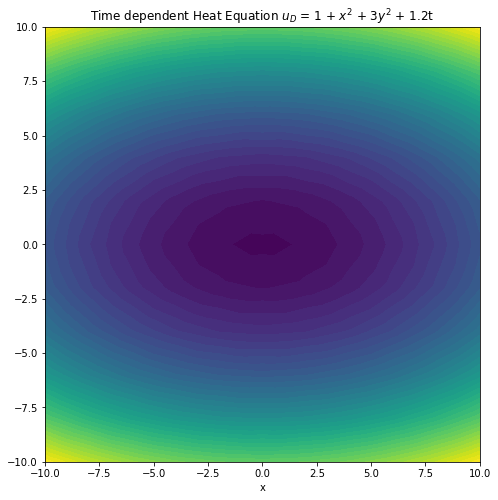

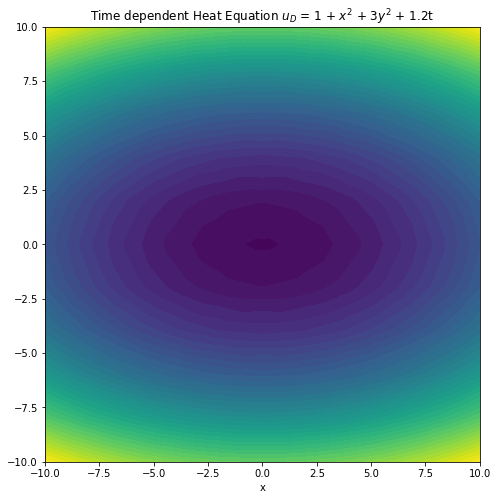

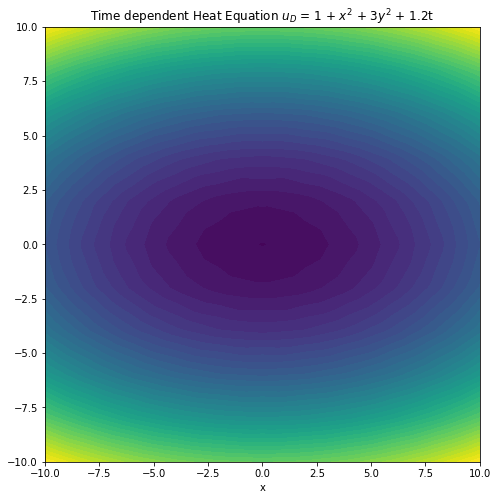

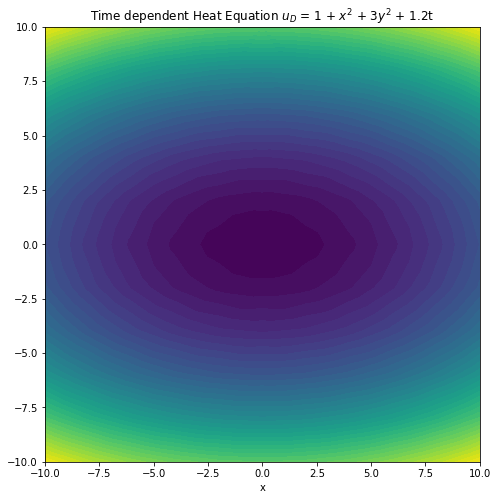

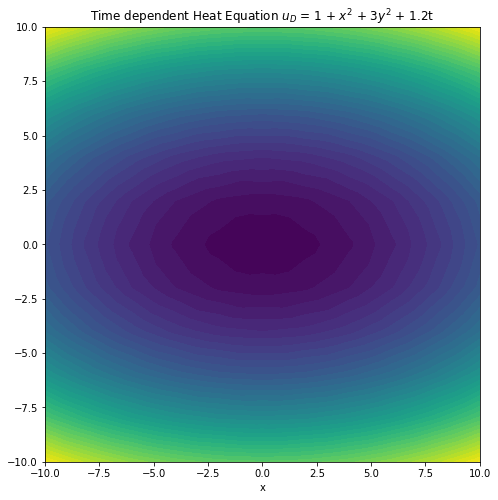

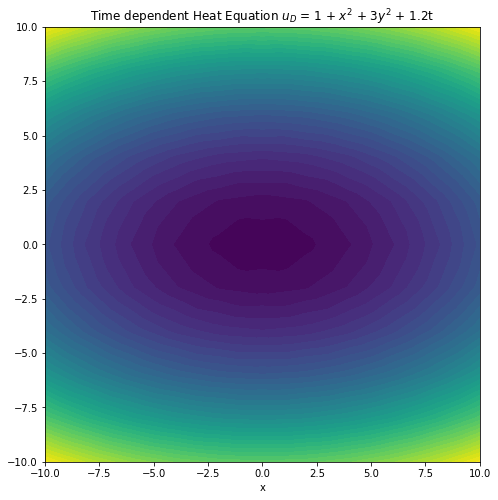

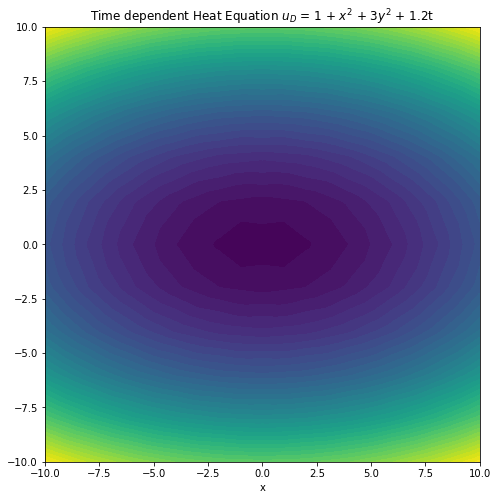

In [48]:
def boundary(x, on_boundary):
    return on_boundary

## Lets define the spatial domain and the mesh parameters
mesh = RectangleMesh(Point(-10.0, -10.0), Point(10.0, 10.0), 10, 10, "crossed")
#plot(mesh)

## Define the function space
V = FunctionSpace(mesh, 'P', 1)

# The boundary condition at time t = 0
u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=0)

## Now, whenever we want to store any value of the u function, we can use the projection of u_D over the function space
u_n = interpolate(u_D, V)
plot(u_n)
    
## define dt
dt = 1

## Declare the test and trial functions
u = TrialFunction(V)
v = TestFunction(V)
f = Constant = (beta - 2 - 2*alpha)
F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a = lhs(F)
L = rhs(F)

for i in range(20):
    # So, we construct the dynamically changing boundary condition with declaring the time parameter to be i
    u_D = Expression('1 + x[0]*x[0] + alpha*x[1]*x[1] + beta*t', degree=2, alpha=alpha, beta=beta, t=i)
    
    ## Dirichlet Boundary condition
    bc = DirichletBC(V, u_D, boundary)
    
    ## Declare the actual function to be solved
    u = Function(V)
    solve(a==L, u, bc)
    
    ## Update previous solution
    u_n.assign(u)
    
    ##
    plt.figure(figsize=(8,8))
    plot(u_n)
    plt.xlabel("x")
    plt.title("Time dependent Heat Equation $u_D$ = 1 + $x^2$ + " + str(alpha) + "$y^2$ + " + str(beta) + "t")